# A beginner's guide to Hypothesis Testing and Python
________________________________________________________________________________________________
### What is hypothesis testing used for?


Hypothesis testing is quite literally the backbone of the scientific method. It is an incredibly useful tool that allows for the testing and measuring of assumptions and hypothesises.  The test itself uses core statistical concepts such as the central limit theorem, confidence intervals, standard deviations, means, alpha values, and a T-test or Z-tests.  

### Understanding the components of a hypothesis test and their setup

To begin with, we need to understand the logic of how we will set this test up. To begin with we need to create whats known as a __Null Hypothesis (Denoted as H0)__ and an __Alternative Hypothesis (Denoted as H1)__.  These hypothesises create a structure where only one of them can be true.  The __Null Hypothesis__ is always the assumption that your observations are not atypical and follows what would be expected from chance.  While the __Alternative Hypothesis__ defines an assumption that, if true, is strongly supported by the evidence furnished by the data.

<br>

To understand how this comparison is made we first need to understand what a normal distribution is. 

<br>

### Normal Distribution

A normal distribution has the following qualities:

1. Possesses a Mean/Median/Mode of 0
2. Has a symmetrical (Bell Shaped) distribution. (Area to the left of the Mean is 1/2 and same with the right)
3. Abides by the emperical rule
4. Area under the curve totals 1
5. Asymptotic to the horizontal axis

<br>

What is the empirical rule?

The empirical rule, also known as the three-sigma rule, is a statistical rule that states that for a normal distribution, almost all observed data will fall within three stnadard deviations ( denoted by $\sigma$).  The rule follows the following logic:

1. 68% of observations fall within one standard deviation of the mean
2. 95% of observations fall within two standard deviations of the mean
3. 99.7% of observations fall within three standard deviations of the mean

<br>

Below is a graph demonstrating the area under the curve for a two-tailed 95% confidence interval.



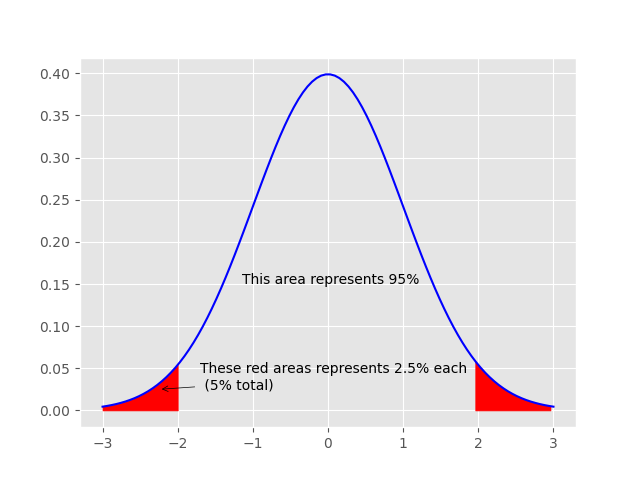

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
plt.style.use('ggplot')
mean=0
std=1
x=np.linspace(mean-3*std, mean+3*std,100)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(-3,-1.96,.1)
px1=np.arange(1.96,3,.1)
plt.fill_between(px,iq.pdf(px),color='r')
plt.fill_between(px1,iq.pdf(px1),color='r')
plt.annotate('This area represents 95% ', xy=(-1, 0.05),xytext=(-1.15, 0.15))
plt.annotate('These red areas represents 2.5% each \n (5% total)', xy=(-2.25,0.025), xytext=(-1.7,0.025), arrowprops = {"arrowstyle":"->", "color":"black"})


plt.show()


Now how does this tie into our hypothesis test?
The red areas represents a region where there is a 5% likelyhood of a samples mean to exist.  We use this area as a barometer to guage whether or not your sample data is likely to come from the same distribution.  If it falls in the red area, it's statistically less than 5% likely.

But how do we measure whether or not our sample data falls in this red region?  For this we need to introduce Z-Tests and T-tests.

First, we need to define when it is appropriate to use each test.

Z-tests should be used when working with data that has more than 30 observations, a mean value, and the population standard deviation is known.  It should also be used when dealing with proportions if the follow criteria are true:

1. n*p0 > 10
2. n(1-p0) > 10

T-tests on the other hand should be used when dealing with data that has more than 30 observations, a mean value, and the population standard deviation is unknown.  It should also be used when dealing with data that has more than 30 observations, a mean value, a population that is normally distribution, however the population standard deviation is unknown.

<br>
<br>

***

### Z-Test


A Z-Test is a type of hypothesis test where you find a critival value of z in a z-table based on your sample's statistics.  To calculate a z-score you can either use software or a physical Z-table (careful to use the proper chart!).  We begin by using the Z-Table to look up the Z-score of our 95% confidence interval, which happens to be 1.645.  We compare this value to the Z score we get from the follow equation to determine if we should reject or accept the null hypothesis:

## Z = $\frac{\bar{x}-\mu}{\sigma / \sqrt{n}}$

$\bar{x}$ = sample value mean

$\mu$ = null hypothesis mean

$\sigma$ = population standard deviation (the SD of your null hypothesis)

$n$ = number of sample observations

<br>

How to calculate the $\sigma$ (populations standard deviation):

## $\sigma$ = $\sqrt{\frac{(p(1-p)}{n}}$

$p$ = probability of measured outcome (null hypothesis)


<br>



If the Z value that you calculate is greater than than the confidence intervals Z value, then you have enough evidence to reject the null hypothesis.

It should also be noted in a scenario where you are using a two-tailed hypothesis test you would divide your alpha in half and look for the corresponding positive/negative z-score.  In the example where we are looking for a 95% confidence interval, we would find the z-score for 2.5% and 97.5%. The situation where you would use a two tall test would be a null hypothesis where you're measuring if two proportions are the same)

<br>

In the scenario where you are using a 95% confidecne interval the z-scores would be +/- 1.96.  Any value that is higher than 1.96 or lower than -1.96 would reject the null hypothesis.
<br> 
<br>
***

### T- Statistic

A T-test is a type of hypothesis test where you compare the resulting T statistics to your alpha value.  It's important to note whether your two groups are dependent or independent, as the formulas you use will be altered slightly.  We begin by calculating the mean and variance of the two groups we are comparing along with the number of observations and feed them into the follow equation:

## T-statistic = $\frac{|{\bar{x1} - \bar{x2}|}}{\sqrt{\frac{S1^2}{n1} + \frac{S2^2}{n2}}}$

$\bar{x1}$ = mean of group 1

$\bar{x2}$ = mean of group 2

$S1^2$ = variance of group 1

$S2^2$ = variance of group 1

$n1$ = number of observations in group 1

$n2$ = number of observations in group 2

The larger the T-Value the larger the difference between the groups.  

***



### An example using Z-test

(Please restart page if equations are not loading properly.  Jupyter Notebooks is experiencing issues with Latex )

A researcher is testing the claim that the average adult consumes 1.7 cups of coffee per day.  Assume the population standard deviation is 0.5 cups per day.

A sample of 30 adults averaged 1.85 cups of coffee per day.  Test the researcher's claim at the $\alpha$ = 0.05 significance level by comparing the calculated z-score (sample z-score) to the critical z-score (confidence interval).

To create our hypothesis test we first will define the __Null Hypothesis__ with the assumption that the average adult __does__ consume 1.7 cups of coffee per day  Next, we define the __Alternative Hypothesis__ by defining our assumptions, which in this case that the average adult does not consume 1.7 cups of coffee per day. Finally, we will pick a confidence level that will determine our alpha value.  For this case we will use a 95% confidence interval.  A confidence intervall tells us the probability that the overall population mean falls within the bounded interval.  The compliment of this confidence interval is called the alpha.  In our case, we have an alpha of 5%, which denotes the probability of rejecting the null hypothesis when it is true.  In other words, its the chance of commiting a type 1 error, which means in our case there is a 5% risk of concluding that a difference exists when there is no actual difference

<br>

Below is our hypothesis test for a potentially biased coin:

H0: $\mu$ = 1.7

H1: $\mu$ $\not=$ 1.7

<br>
<br>

To begin with we need to calculate the standard error of the population mean( aka the null hypothesis ).


## $\hat{\sigma}_\bar{x}$ = $\frac{\sigma}{\sqrt{n}}$ = $\frac{0.5}{\sqrt{30}}$ = 0.0913

$\hat{\sigma}$ = population standard deviation

$n$ = number of observations in sample

<br>
<br>

Then for the next step we will use a Z-Test to determine whether the mean from an unbiased coin differ from that of our observations

## Z = $\frac{\bar{x}-\mu}{\hat{\sigma}_\bar{x}}$ = $\frac{1.85-1.7}{0.0912}$ = 1.64

$\hat{\sigma}_\bar{x}$ = standard deviation of the sample

$\mu$ = mean of the population

$\bar{x}$ = mean of the sample

<br>
<br>

As we stated before, we have an alpha value of 0.05.

$\alpha$ = 0.05

It's important to remember the nature of our hypothesis test is two-tailed.  Meaning we are measuring if our new observations fall within a critical region above and below an unbiased coin's mean.

For this we must split our alpha value in half and find the z-score that corresponds with 2.5% and 97.5%, which happens to be +/- 1.96.

<br>

We must now compare our Z-score to the alpha value to determine whether or not to reject the null hypothesis:

1.65 < 1.96

As we can see our calculated Z-score is smaller than our critical z-score, meaning we have do not have enough evidence to reject the null hypothesis.  The null hypothesis appears to be valid.


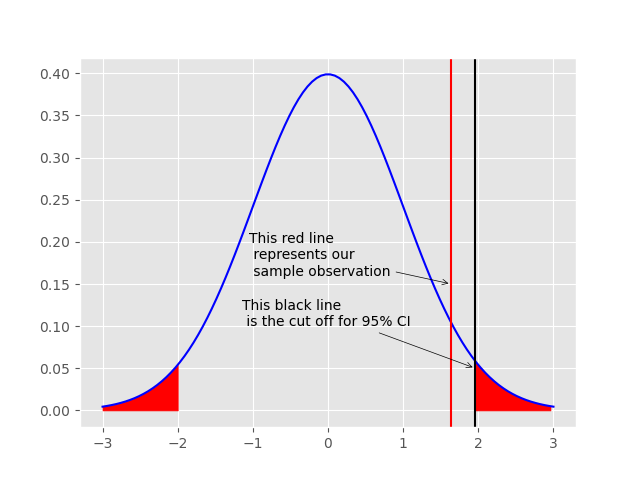

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
plt.style.use('ggplot')
mean=0
std=1
x=np.linspace(mean-3*std, mean+3*std,100)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(-3,-1.96,.1)
px1=np.arange(1.96,3,.1)
plt.fill_between(px,iq.pdf(px),color='r')
plt.fill_between(px1,iq.pdf(px1),color='r')
plt.axvline(x = 1.96, color = 'black')
plt.axvline(x = 1.64, color = 'red')

plt.annotate('This black line \n is the cut off for 95% CI ', xy=(1.96, 0.05),xytext=(-1.15, 0.10), arrowprops = {"arrowstyle":"->", "color":"black"})
plt.annotate('This red line \n represents our \n sample observation', xy=(1.64,0.15), xytext=(-1.05,0.16), arrowprops = {"arrowstyle":"->", "color":"black"})

plt.show()

Below is a simple python walkthrough of the same calculations that we need above for our Z-test.

In [53]:
from scipy import stats as stats

pop_sigma = 0.5

n = 30

x_bar = 1.85

mu = 1.7

sigma_xbar = pop_sigma / math.sqrt(n)

Z = (x_bar - mu) / sigma_xbar



print("Sigma xbar: {}".format(sigma_xbar))
print("Z-score: {}".format(Z))


Sigma xbar: 0.09128709291752768
Z-score: 1.6431676725155


### An example using T-test

Lets say a realtor makes the claim that houses in a particular neighborhood last on the market less than 70 days.  You've gone ahead and taken a sample of 40 houses in your neighboorhood and found that the homes stayed on the market for an average of 81 days with a standard deviation of 29.6 days.  You've assumed that the population is normally distributed and created the following hypothesis test:

H0: $\mu$ $\leq$ 70

H1: $\mu$ > 70

<br>
<br>

First we must calculate the degrees of freedom for our sample:

df = $n$ - 1 = 40-1 = 39

<br>

It's important to consider what kind of test we will be using to calculate an appropriate critical value.  In this case, we will be using a single tailed test with $\alpha$ = 0.05.

Now to get our critical value we must reference a T-distribution chart which shows probabilities under the t-distribution curve. 

(link to a chart: https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/)

For single tailed test with 39 degrees of freedom and an $\alpha$ = 0.05 we find that our critical value is equal to 1.697. 

Calculate the approximate standard error of the mean:

## $\hat{\sigma}_\bar{x}$ = $\frac{s}{\sqrt{n}}$ = $\frac{29.6}{\sqrt{40}}$ = 4.68

Calculate the t-score of the sample mean:

## $t_\bar{x} = \frac{\bar{x}-\mu}{\hat{\sigma}_\bar{x}}$ = $\frac{81-70}{4.68}$ = 2.35

<br>

Now we compare our calculated t value to our critical t-value:

2.35 > 1.697

We have enough evidence to reject the null hypothesis and conclude that there is enough evidence to support the alternative.
